**Gabe Darley**

**CMPS 3240-01**

**Homework 5**

TRUE LABELS FOR TEST DATA:

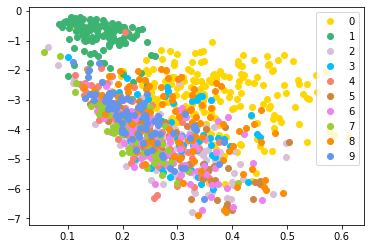

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

test_data = np.loadtxt('features.small.test')

true_res = test_data[:,0]

#Categorize points based on their true value, provided by document
ind_zero = np.where(true_res == 0.)[0]
ind_one = np.where(true_res == 1.)[0]
ind_two = np.where(true_res == 2.)[0]
ind_three = np.where(true_res == 3.)[0]
ind_four = np.where(true_res == 4.)[0]
ind_five = np.where(true_res == 5.)[0]
ind_six = np.where(true_res == 6.)[0]
ind_seven = np.where(true_res == 7.)[0]
ind_eight = np.where(true_res == 8.)[0]
ind_nine = np.where(true_res == 9.)[0]

#Plot points based on true value (color-code!)
plt.plot(test_data[ind_zero, 1], test_data[ind_zero, 2], color='gold', marker='o', linewidth=0, label='0')
plt.plot(test_data[ind_one, 1], test_data[ind_one, 2], color='mediumseagreen', marker='o', linewidth=0, label='1')
plt.plot(test_data[ind_two, 1], test_data[ind_two, 2], color='thistle', marker='o', linewidth=0, label='2')
plt.plot(test_data[ind_three, 1], test_data[ind_three, 2], color='deepskyblue', marker='o', linewidth=0, label='3')
plt.plot(test_data[ind_four, 1], test_data[ind_four, 2], color='salmon', marker='o', linewidth=0, label='4')
plt.plot(test_data[ind_five, 1], test_data[ind_five, 2], color='peru', marker='o', linewidth=0, label='5')
plt.plot(test_data[ind_six, 1], test_data[ind_six, 2], color='violet', marker='o', linewidth=0, label='6')
plt.plot(test_data[ind_seven, 1], test_data[ind_seven, 2], color='yellowgreen', marker='o', linewidth=0, label='7')
plt.plot(test_data[ind_eight, 1], test_data[ind_eight, 2], color='darkorange', marker='o', linewidth=0, label='8')
plt.plot(test_data[ind_nine, 1], test_data[ind_nine, 2], color='cornflowerblue', marker='o', linewidth=0, label='9')

plt.legend()
plt.show()

ERRORS AND GRAPHS FOR PREDICTED VALUES OF TEST DATA BASED ON KNN:

Error for k = 1: 0.651000
Error for k = 11: 0.603000
Error for k = 21: 0.613000
Error for k = 31: 0.622000


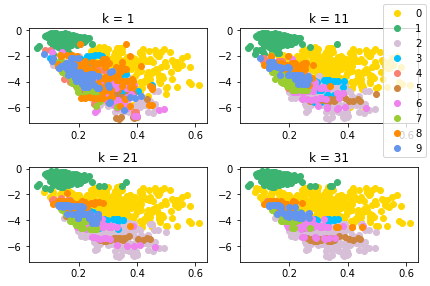

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

#We'll use this to figure out who is the closest to the point
def listsrt(list_val):
    return list_val['distance']

#Method for finding k nearest neighbors of one test point using entire training set
def knn(test_data, train_data, k):
    dist_list = []

    for i in range(len(train_data)):
        dim_one_diff = train_data[i][1] - test_data[1]
        dim_two_diff = train_data[i][2] - test_data[2]
        eu_dist = math.sqrt((dim_one_diff ** 2) + (dim_two_diff ** 2))
        dist_list.append({'distance': eu_dist, 'index': i})

    dist_list.sort(key=listsrt)


    vote_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    for j in range(k):
        vote_ind = int(train_data[(dist_list[j]['index'])][0])
        vote_list[vote_ind] += 1

    vote_max = np.argmax(vote_list)
    return vote_max

#Establish training data, testing data, k values
train_data = np.loadtxt('features.small.train')
test_data = np.loadtxt('features.small.test')
k_list = [1, 11, 21, 31]
e_list = []
k_results = []

#Run through test set, making predictions for each k value
#Keep track of errors of each k, as well as the predicted values to plot later
for k in range(len(k_list)):
    error_num = 0
    result_list = []

    for i in range(len(test_data)):
        predict_result = knn(test_data[i], train_data, k_list[k])
        result_list.append(predict_result)
        if predict_result != test_data[i][0]:
            error_num += 1
    e_list.append(error_num / len(test_data))

    print('Error for k = %d: %f' % (k_list[k], e_list[k]))
    k_results.append(result_list)

#Set up some graphs B-)
fig, axs = plt.subplots(2,2)
plt_list = [(0,0),(0,1), (1,0), (1,1)]

#Plot k graphs
for i in range(len(plt_list)):
    predict_res = np.array(k_results[i])
    
    #Categorize points based on their predicted value, provided by results we calculated in for loop
    ind_zero = np.where(predict_res == 0)[0]
    ind_one = np.where(predict_res == 1)[0]
    ind_two = np.where(predict_res == 2)[0]
    ind_three = np.where(predict_res == 3)[0]
    ind_four = np.where(predict_res == 4)[0]
    ind_five = np.where(predict_res == 5)[0]
    ind_six = np.where(predict_res == 6)[0]
    ind_seven = np.where(predict_res == 7)[0]
    ind_eight = np.where(predict_res == 8)[0]
    ind_nine = np.where(predict_res == 9)[0]

    #Plot points based on predicted value (color-code with same colors)
    axs[plt_list[i]].plot(test_data[ind_zero, 1], test_data[ind_zero, 2], color='gold', marker='o', linewidth=0, label='0')
    axs[plt_list[i]].plot(test_data[ind_one, 1], test_data[ind_one, 2], color='mediumseagreen', marker='o', linewidth=0, label='1')
    axs[plt_list[i]].plot(test_data[ind_two, 1], test_data[ind_two, 2], color='thistle', marker='o', linewidth=0, label='2')
    axs[plt_list[i]].plot(test_data[ind_three, 1], test_data[ind_three, 2], color='deepskyblue', marker='o', linewidth=0, label='3')
    axs[plt_list[i]].plot(test_data[ind_four, 1], test_data[ind_four, 2], color='salmon', marker='o', linewidth=0, label='4')
    axs[plt_list[i]].plot(test_data[ind_five, 1], test_data[ind_five, 2], color='peru', marker='o', linewidth=0, label='5')
    axs[plt_list[i]].plot(test_data[ind_six, 1], test_data[ind_six, 2], color='violet', marker='o', linewidth=0, label='6')
    axs[plt_list[i]].plot(test_data[ind_seven, 1], test_data[ind_seven, 2], color='yellowgreen', marker='o', linewidth=0, label='7')
    axs[plt_list[i]].plot(test_data[ind_eight, 1], test_data[ind_eight, 2], color='darkorange', marker='o', linewidth=0, label='8')
    axs[plt_list[i]].plot(test_data[ind_nine, 1], test_data[ind_nine, 2], color='cornflowerblue', marker='o', linewidth=0, label='9')

#Title them :)
axs[0,0].set_title("k = 1")
axs[0,1].set_title("k = 11")
axs[1,0].set_title("k = 21")
axs[1,1].set_title("k = 31")

fig.tight_layout()
fig.legend(labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

TRUE VALUES AND ERROR + GRAPHS WITH RBF ALGORITHM

Error for r = 0.01: 0.653000
Error for r = 0.05: 0.602000
Error for r = 0.10: 0.624000
Error for r = 0.50: 0.653000
Error for r = 1.00: 0.660000


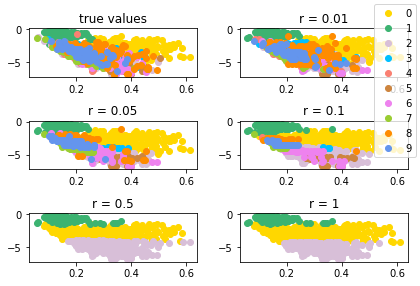

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

#We'll use this later when evaluating RBF
def phi(val):
    return np.exp(-0.5 * (val ** 2))

#Method for finding k nearest neighbors of one test point using entire training set
def rbf(test_data, train_data, r):
    alpha_list = []

    for i in range(len(train_data)):
        dim_one_diff = train_data[i][1] - test_data[1]
        dim_two_diff = train_data[i][2] - test_data[2]
        eu_dist = math.sqrt((dim_one_diff ** 2) + (dim_two_diff ** 2))
        
        alpha = phi(eu_dist / r)
        alpha_list.append({'alpha': alpha, 'index': i})

    vote_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    for j in range(len(train_data)):
        vote_ind = int(train_data[(alpha_list[j]['index'])][0])
        vote_list[vote_ind] += alpha_list[j]['alpha']

    vote_max = np.argmax(vote_list)
    return vote_max

#Establish training data, testing data, r values
train_data = np.loadtxt('features.small.train')
test_data = np.loadtxt('features.small.test')
r_list = [0.01, 0.05, 0.1, 0.5, 1]
e_list = []
r_results = []

#Run through test set, making predictions for each r value
#Keep track of errors of each r, as well as the predicted values to plot later
for r in range(len(r_list)):
    error_num = 0
    result_list = []

    for i in range(len(test_data)):
        predict_result = rbf(test_data[i], train_data, r_list[r])
        result_list.append(predict_result)
        if predict_result != test_data[i][0]:
            error_num += 1
    e_list.append(error_num / len(test_data))

    print('Error for r = %.2f: %f' % (r_list[r], e_list[r]))
    r_results.append(result_list)

#Set up some graphs B-)
fig, axs = plt.subplots(3,2)
plt_list = [(0,1),(1,0), (1,1), (2,0), (2,1)]

true_res = test_data[:,0]

#Categorize points based on their true value, provided by document
ind_zero = np.where(true_res == 0.)[0]
ind_one = np.where(true_res == 1.)[0]
ind_two = np.where(true_res == 2.)[0]
ind_three = np.where(true_res == 3.)[0]
ind_four = np.where(true_res == 4.)[0]
ind_five = np.where(true_res == 5.)[0]
ind_six = np.where(true_res == 6.)[0]
ind_seven = np.where(true_res == 7.)[0]
ind_eight = np.where(true_res == 8.)[0]
ind_nine = np.where(true_res == 9.)[0]

#Plot points based on true value (color-code!)
axs[0,0].plot(test_data[ind_zero, 1], test_data[ind_zero, 2], color='gold', marker='o', linewidth=0, label='0')
axs[0,0].plot(test_data[ind_one, 1], test_data[ind_one, 2], color='mediumseagreen', marker='o', linewidth=0, label='1')
axs[0,0].plot(test_data[ind_two, 1], test_data[ind_two, 2], color='thistle', marker='o', linewidth=0, label='2')
axs[0,0].plot(test_data[ind_three, 1], test_data[ind_three, 2], color='deepskyblue', marker='o', linewidth=0, label='3')
axs[0,0].plot(test_data[ind_four, 1], test_data[ind_four, 2], color='salmon', marker='o', linewidth=0, label='4')
axs[0,0].plot(test_data[ind_five, 1], test_data[ind_five, 2], color='peru', marker='o', linewidth=0, label='5')
axs[0,0].plot(test_data[ind_six, 1], test_data[ind_six, 2], color='violet', marker='o', linewidth=0, label='6')
axs[0,0].plot(test_data[ind_seven, 1], test_data[ind_seven, 2], color='yellowgreen', marker='o', linewidth=0, label='7')
axs[0,0].plot(test_data[ind_eight, 1], test_data[ind_eight, 2], color='darkorange', marker='o', linewidth=0, label='8')
axs[0,0].plot(test_data[ind_nine, 1], test_data[ind_nine, 2], color='cornflowerblue', marker='o', linewidth=0, label='9')

#Plot on the 5 other plots!
for i in range(len(plt_list)):
    predict_res = np.array(r_results[i])
    
    #Categorize points based on their predicted values, provided by RBF algorithm in prior for loop
    ind_zero = np.where(predict_res == 0)[0]
    ind_one = np.where(predict_res == 1)[0]
    ind_two = np.where(predict_res == 2)[0]
    ind_three = np.where(predict_res == 3)[0]
    ind_four = np.where(predict_res == 4)[0]
    ind_five = np.where(predict_res == 5)[0]
    ind_six = np.where(predict_res == 6)[0]
    ind_seven = np.where(predict_res == 7)[0]
    ind_eight = np.where(predict_res == 8)[0]
    ind_nine = np.where(predict_res == 9)[0]

    #Plot points based on predicted value for this r (color-code with same colors)
    axs[plt_list[i]].plot(test_data[ind_zero, 1], test_data[ind_zero, 2], color='gold', marker='o', linewidth=0, label='0')
    axs[plt_list[i]].plot(test_data[ind_one, 1], test_data[ind_one, 2], color='mediumseagreen', marker='o', linewidth=0, label='1')
    axs[plt_list[i]].plot(test_data[ind_two, 1], test_data[ind_two, 2], color='thistle', marker='o', linewidth=0, label='2')
    axs[plt_list[i]].plot(test_data[ind_three, 1], test_data[ind_three, 2], color='deepskyblue', marker='o', linewidth=0, label='3')
    axs[plt_list[i]].plot(test_data[ind_four, 1], test_data[ind_four, 2], color='salmon', marker='o', linewidth=0, label='4')
    axs[plt_list[i]].plot(test_data[ind_five, 1], test_data[ind_five, 2], color='peru', marker='o', linewidth=0, label='5')
    axs[plt_list[i]].plot(test_data[ind_six, 1], test_data[ind_six, 2], color='violet', marker='o', linewidth=0, label='6')
    axs[plt_list[i]].plot(test_data[ind_seven, 1], test_data[ind_seven, 2], color='yellowgreen', marker='o', linewidth=0, label='7')
    axs[plt_list[i]].plot(test_data[ind_eight, 1], test_data[ind_eight, 2], color='darkorange', marker='o', linewidth=0, label='8')
    axs[plt_list[i]].plot(test_data[ind_nine, 1], test_data[ind_nine, 2], color='cornflowerblue', marker='o', linewidth=0, label='9')

#Title them :)
axs[0,0].set_title("true values")
axs[0,1].set_title("r = 0.01")
axs[1,0].set_title("r = 0.05")
axs[1,1].set_title("r = 0.1")
axs[2,0].set_title("r = 0.5")
axs[2,1].set_title("r = 1")

fig.tight_layout()
fig.legend(labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])